# Stop Words

Stop words are frequently used words in a language such as "a", "the", "so" etc. (in english) that do not add a lot of value to certain NLP tasks. Hence it is better to remove them during pre-processing stage.

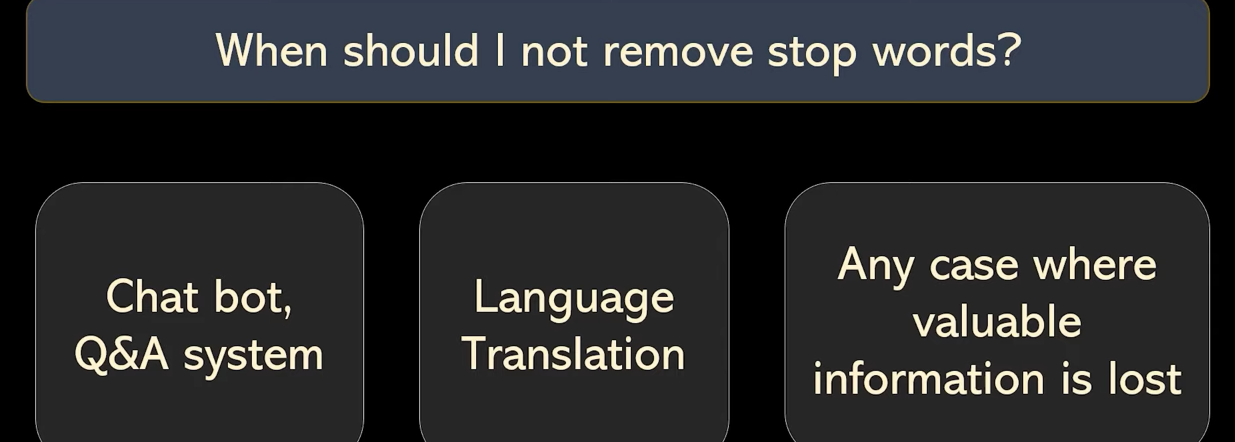

In [1]:
import spacy


In [4]:
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [5]:
len(STOP_WORDS) 

326

In [3]:
# Load the spacy model

nlp = spacy.load("en_core_web_sm")

# Process the text
doc = nlp("We just opened our wings, the flying part is coming soon")

# Print stop words in the document
for token in doc:
    if token.is_stop:
        print(token)

We
just
our
the
part
is


In [21]:
def preprocess(text):
    doc = nlp(text)
    
    no_stop_words = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(no_stop_words)

In [22]:
preprocess("We just opened our wings, the flying part is coming soon")

'opened wings flying coming soon'

In [23]:
import pandas as pd

df = pd.read_json("doj_press.json", lines=True)
df.shape

(13087, 6)

In [24]:
df.head()

,id,title,contents,date,topics,components
0,None,Convicted Bomb Plotter Sentenced to 30 Years,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",2014-10-01T00:00:00-04:00,[],[National Security Division (NSD)]
1,12-919,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25T00:00:00-04:00,[],[Environment and Natural Resources Division]
2,11-1002,$1 Million Settlement Reached for Natural Reso...,BOSTON– A $1-million settlement has been...,2011-08-03T00:00:00-04:00,[],[Environment and Natural Resources Division]
3,10-015,10 Las Vegas Men Indicted \r\nfor Falsifying V...,WASHINGTON—A federal grand jury in Las Vegas...,2010-01-08T00:00:00-05:00,[],[Environment and Natural Resources Division]
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]


In [25]:
df = df[ df["topics"].str.len() != 0] #filtering out rows with no topics
df.head(5)

,id,title,contents,date,topics,components
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]
7,14-1412,14 Indicted in Connection with New England Com...,A 131-count criminal indictment was unsealed t...,2014-12-17T00:00:00-05:00,[Consumer Protection],[Civil Division]
19,17-1419,2017 Southeast Regional Animal Cruelty Prosecu...,The United States Attorney’s Office for the Mi...,2017-12-14T00:00:00-05:00,[Environment],"[Environment and Natural Resources Division, U..."
22,15-1562,21st Century Oncology to Pay $19.75 Million to...,"21st Century Oncology LLC, has agreed to pay $...",2015-12-18T00:00:00-05:00,"[False Claims Act, Health Care Fraud]",[Civil Division]
23,17-1404,21st Century Oncology to Pay $26 Million to Se...,21st Century Oncology Inc. and certain of its ...,2017-12-12T00:00:00-05:00,"[Health Care Fraud, False Claims Act]","[Civil Division, USAO - Florida, Middle]"


In [26]:
df.shape

(4688, 6)

In [27]:
df = df.head(100)

In [28]:
df.shape

(100, 6)

In [29]:
df['contents'].iloc[4]

'21st Century Oncology Inc. and certain of its subsidiaries and affiliates have agreed to pay $26 million to the government to resolve a self-disclosure relating to the submission of false attestations regarding the company’s use of electronic health records software and separate allegations that they violated the False Claims Act by submitting, or causing the submission of, claims for certain services provided pursuant to referrals from physicians with whom they had improper financial relationships. \xa0 “The Justice Department is committed to zealously investigating improper financial relationships that have the potential to compromise physicians’ medical judgment,” said Acting Assistant Attorney General Chad A. Readler of the Justice Department’s Civil Division.\xa0 “However, we will work with companies that accept responsibility for their past compliance failures and promptly take corrective action.”  \xa0 21st Century Oncology, which is headquartered in Fort Myers, Florida, owns a

In [34]:
len(df['contents'].iloc[4])

5504

In [30]:
#removing stop words

In [32]:
df['contents_new'] = df['contents'].apply(preprocess)

In [33]:
df.head(5)

,id,title,contents,date,topics,components,contents_new
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division],U.S. Department Justice U.S. Environmental Pro...
7,14-1412,14 Indicted in Connection with New England Com...,A 131-count criminal indictment was unsealed t...,2014-12-17T00:00:00-05:00,[Consumer Protection],[Civil Division],131 count criminal indictment unsealed today B...
19,17-1419,2017 Southeast Regional Animal Cruelty Prosecu...,The United States Attorney’s Office for the Mi...,2017-12-14T00:00:00-05:00,[Environment],"[Environment and Natural Resources Division, U...",United States Attorney Office Middle District ...
22,15-1562,21st Century Oncology to Pay $19.75 Million to...,"21st Century Oncology LLC, has agreed to pay $...",2015-12-18T00:00:00-05:00,"[False Claims Act, Health Care Fraud]",[Civil Division],21st Century Oncology LLC agreed pay $ 19.75 m...
23,17-1404,21st Century Oncology to Pay $26 Million to Se...,21st Century Oncology Inc. and certain of its ...,2017-12-12T00:00:00-05:00,"[Health Care Fraud, False Claims Act]","[Civil Division, USAO - Florida, Middle]",21st Century Oncology Inc. certain subsidiarie...


In [36]:
len(df['contents_new'].iloc[4])

4217